In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_city_ride_data = pd.merge(ride_data,city_data, on ="city")

# Display the data table for preview
combine_city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

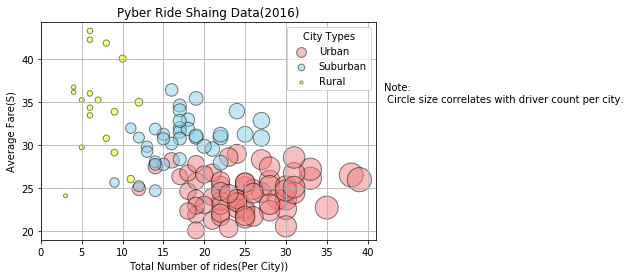

In [131]:
# Obtain the x and y coordinates for each of the three city types

df_ride_per_city = combine_city_ride_data.groupby(["city"])["ride_id"].count()
x_limit = df_ride_per_city.max()

df_avg_fare_per_city = combine_city_ride_data.groupby(["city"])["fare"].mean()
y_limit = df_avg_fare_per_city.max()

df_driver_count_per_city = combine_city_ride_data.groupby(["city"])["driver_count"].count()

df_city_type = combine_city_ride_data.groupby(["city"])["type"].max()

new_df = pd.DataFrame({"Total Rides":df_ride_per_city, "Average Fare":df_avg_fare_per_city,"Total Drivers":df_driver_count_per_city
                      ,"City Type":df_city_type})

df_urban = new_df[new_df["City Type"] == "Urban"]
df_suburban = new_df[new_df["City Type"] == "Suburban"]
df_rural = new_df[new_df["City Type"] == "Rural"]



x_axis = np.arange(0, x_limit, 5)
y_axis = np.arange(0, y_limit, 5)

plt.xlim(0,x_limit+2)
plt.ylim(19,y_limit+1)

# Build the scatter plots for each city types

plt.scatter(df_urban["Total Rides"], df_urban["Average Fare"], marker="o", facecolors="lightcoral", edgecolors="black"
           ,s = df_urban["Total Drivers"]*15,alpha= 0.5,label = "Urban")

plt.scatter(df_suburban["Total Rides"], df_suburban["Average Fare"], marker="o", facecolors="skyblue", edgecolors="black"
           ,s = df_suburban["Total Drivers"]*10,alpha= 0.5,label = "Suburban")

plt.scatter(df_rural["Total Rides"], df_rural["Average Fare"], marker="o", facecolors="yellow", edgecolors="black"
           ,s = df_rural["Total Drivers"]*5,alpha= 0.5,label = "Rural")

# Incorporate the other graph properties

plt.title("Pyber Ride Shaing Data(2016)")
plt.xlabel("Total Number of rides(Per City))")
plt.ylabel("Average Fare(S)")

# Create a legend

plt.legend(title="City Types", loc="upper right", markerscale=0.5)

# Incorporate a text label regarding circle size

plt.text(42,35,"Note:\n Circle size correlates with driver count per city.")
plt.grid()

# Save Figure
plt.savefig("data/PyberRide.png")
plt.show()

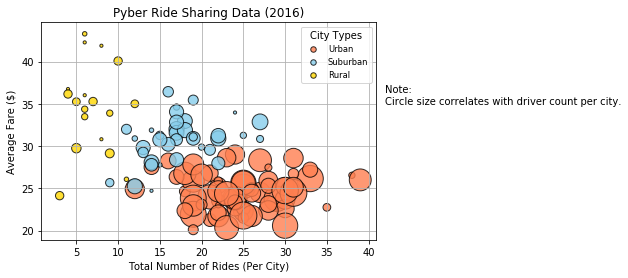

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

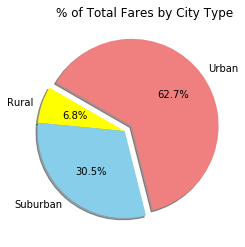

In [141]:
# Calculate Type Percents

total_fare = combine_city_ride_data.groupby(["type"])["fare"].sum()

# Build Pie Chart

plt.pie(total_fare, explode =(0,0,0.1),labels = ["Rural","Suburban","Urban"] ,colors = ["yellow","skyblue","lightcoral"],autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title("% of Total Fares by City Type",loc="right")

# Save Figure
plt.savefig("data/TotalFarePieChart.png")
plt.show()

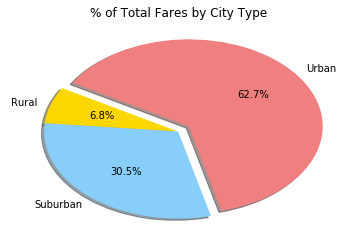

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

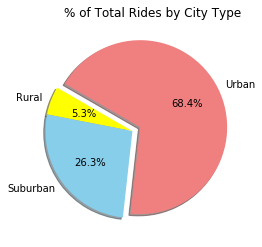

In [140]:
# Calculate Ride Percents
total_rides = combine_city_ride_data.groupby(["type"])["ride_id"].count()

# Build Pie Chart

plt.pie(total_rides, explode =(0,0,0.1),labels = ["Rural","Suburban","Urban"] ,colors = ["yellow","skyblue","lightcoral"],autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title("% of Total Rides by City Type",loc="right")

# Save Figure
plt.savefig("data/TotalRidesPieChart.png")
plt.show()

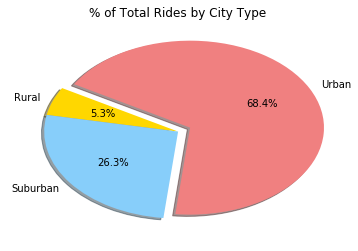

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

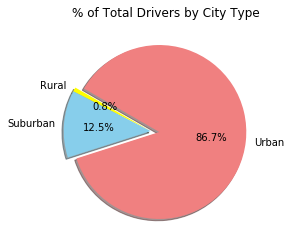

In [144]:
# Calculate Driver Percents

total_driver = combine_city_ride_data.groupby(["type"])["driver_count"].sum()

# Build Pie Charts

plt.pie(total_driver, explode =(0,0,0.1),labels = ["Rural","Suburban","Urban"] ,colors = ["yellow","skyblue","lightcoral"],autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type",loc="right")

# Save Figure
plt.savefig("data/TotalDriverPieChart.png")
plt.show()

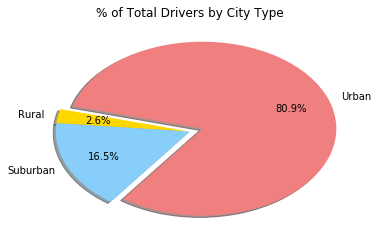

In [6]:
# Show Figure
plt.show()